<a href="https://colab.research.google.com/github/nitron-alpha-kplr/projet-RNCP/blob/main/2_Streamlit_UI_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Créer une application streamlit pour créer une interface utilisateur pour la prédiction**
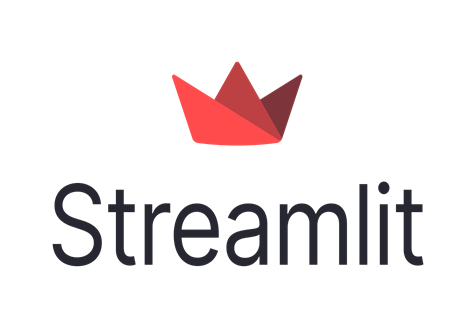


**Installer Streamlit**


In [ ]:

!pip install -q streamlit

**Écrire le script streamlit_app.py**


In [ ]:
%%writefile streamlit_app.py
from sklearn.preprocessing import OrdinalEncoder
import streamlit as st
import pandas as pd
import joblib
# Load the saved model from a file
id=1
knn_loaded = joblib.load('knn_model.joblib')
# Set the title and page layout
st.set_page_config(page_title='Intrusion Detection', page_icon='🔒', layout='wide')
st.title('Intrusion Detection')
# Define the input fields for each feature
duration = st.number_input('Duration', min_value=0)
protocol_type = st.selectbox('Protocol Type', ['tcp', 'udp', 'icmp'])
service = st.selectbox('Service', ['http', 'smtp', 'ftp', 'dns', 'ssh', 'ssl', 'dhcp'])
flag = st.selectbox('Flag', ['SF', 'REJ', 'RSTO', 'RSTR', 'S0', 'S1', 'S2', 'S3'])
src_bytes = st.number_input('Source Bytes', min_value=0)
dst_bytes = st.number_input('Destination Bytes', min_value=0)
land = st.selectbox('Land', [0, 1])
wrong_fragment = st.number_input('Wrong Fragment', min_value=0)
urgent = st.number_input('Urgent', min_value=0)
hot = st.number_input('Hot', min_value=0)
num_failed_logins = st.number_input('Number of Failed Logins', min_value=0)
logged_in = st.selectbox('Logged In', [0, 1])
num_compromised = st.number_input('Number of Compromised Connections', min_value=0)
root_shell = st.selectbox('Root Shell', [0, 1])
su_attempted = st.selectbox('SU Attempted', [0, 1])
num_root = st.number_input('Number of Root Accesses', min_value=0)
num_file_creations = st.number_input('Number of File Creations', min_value=0)
num_shells = st.number_input('Number of Shells', min_value=0)
num_access_files = st.number_input('Number of Access Files', min_value=0)
num_outbound_cmds = st.number_input('Number of Outbound Commands', min_value=0)
is_host_login = st.selectbox('Is Host Login', [0, 1])
is_guest_login = st.selectbox('Is Guest Login', [0, 1])
count = st.number_input('Count', min_value=0)
srv_count = st.number_input('Service Count', min_value=0)
serror_rate = st.number_input('Serror Rate', min_value=0.0, max_value=1.0, step=0.01)
srv_serror_rate = st.number_input('Srv Serror Rate', min_value=0.0, max_value=1.0, step=0.01)
rerror_rate = st.number_input('Rerror Rate', min_value=0.0, max_value=1.0, step=0.01)
srv_rerror_rate = st.number_input('Srv Rerror Rate', min_value=0.0, max_value=1.0, step=0.01)
same_srv_rate = st.number_input('Same Service Rate', min_value=0.0, max_value=1.0, step=0.01)
diff_srv_rate = st.number_input('Different Service Rate', min_value=0.0, max_value=1.0, step=0.01)
srv_diff_host_rate = st.number_input('Srv Diff Host Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_count = st.number_input('Destination Host Count', min_value=0)
dst_host_srv_count = st.number_input('Destination Host Service Count', min_value=0)
dst_host_same_srv_rate = st.number_input('Destination Host Same Service Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_diff_srv_rate = st.number_input('Destination Host Difference Service Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_same_src_port_rate = st.number_input('Destination Host Same Service Port Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_srv_diff_host_rate = st.number_input('Destination Host  Service different Host Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_serror_rate = st.number_input('Destination Host  Serror Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_srv_serror_rate = st.number_input('Destination Host  Service serror Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_rerror_rate = st.number_input('Destination Host  rerror Rate', min_value=0.0, max_value=1.0, step=0.01)
dst_host_srv_rerror_rate = st.number_input('Destination Host  Service rerror Rate', min_value=0.0, max_value=1.0, step=0.01)
# Create a dictionary with the user input values
input_dict = {'id':id,'duration': duration,
              'protocol_type': protocol_type,
              'service': service,
              'flag': flag,
              'src_bytes': src_bytes,
              'dst_bytes': dst_bytes,
              'land': land,
              'wrong_fragment': wrong_fragment,
              'urgent': urgent,
              'hot': hot,
              'num_failed_logins': num_failed_logins,
              'logged_in': logged_in,
              'num_compromised': num_compromised,
              'root_shell': root_shell,
              'su_attempted': su_attempted,
              'num_root': num_root,
              'num_file_creations': num_file_creations,
              'num_shells': num_shells,
              'num_access_files': num_access_files,
              'num_outbound_cmds': num_outbound_cmds,
              'is_host_login': is_host_login,
              'is_guest_login': is_guest_login,
              'count': count,
              'srv_count': srv_count,
              'serror_rate': serror_rate,
              'srv_serror_rate': srv_serror_rate,
              'rerror_rate': rerror_rate,
              'srv_rerror_rate': srv_rerror_rate,
              'same_srv_rate': same_srv_rate,
              'diff_srv_rate': diff_srv_rate,
              'srv_diff_host_rate': srv_diff_host_rate,
              'dst_host_count': dst_host_count,
              'dst_host_srv_count': dst_host_srv_count,
              'dst_host_same_srv_rate': dst_host_same_srv_rate,
              'dst_host_diff_srv_rate': dst_host_diff_srv_rate,
              'dst_host_same_src_port_rate': dst_host_same_src_port_rate,
              'dst_host_srv_diff_host_rate': dst_host_srv_diff_host_rate,
              'dst_host_serror_rate': dst_host_serror_rate,
              'dst_host_srv_serror_rate': dst_host_srv_serror_rate,
              'dst_host_rerror_rate': dst_host_rerror_rate,
              'dst_host_srv_rerror_rate': dst_host_srv_rerror_rate}


# Encode categorical features
input_df = pd.DataFrame(input_dict, index=[0])
categorical_features = ['protocol_type', 'service', 'flag']
for feature in categorical_features:
    ord_enc = OrdinalEncoder()
    input_df[feature] = ord_enc.fit_transform(input_df[[feature]])
# Make predictions on the input data
if st.button("Predict"):
    prediction = knn_loaded.predict(input_df)

    # Display the prediction
    st.write('Prediction:', prediction[0])


In [ ]:
!streamlit run /content/streamlit_app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 3.73s
your url is: https://legal-horses-sip.loca.lt


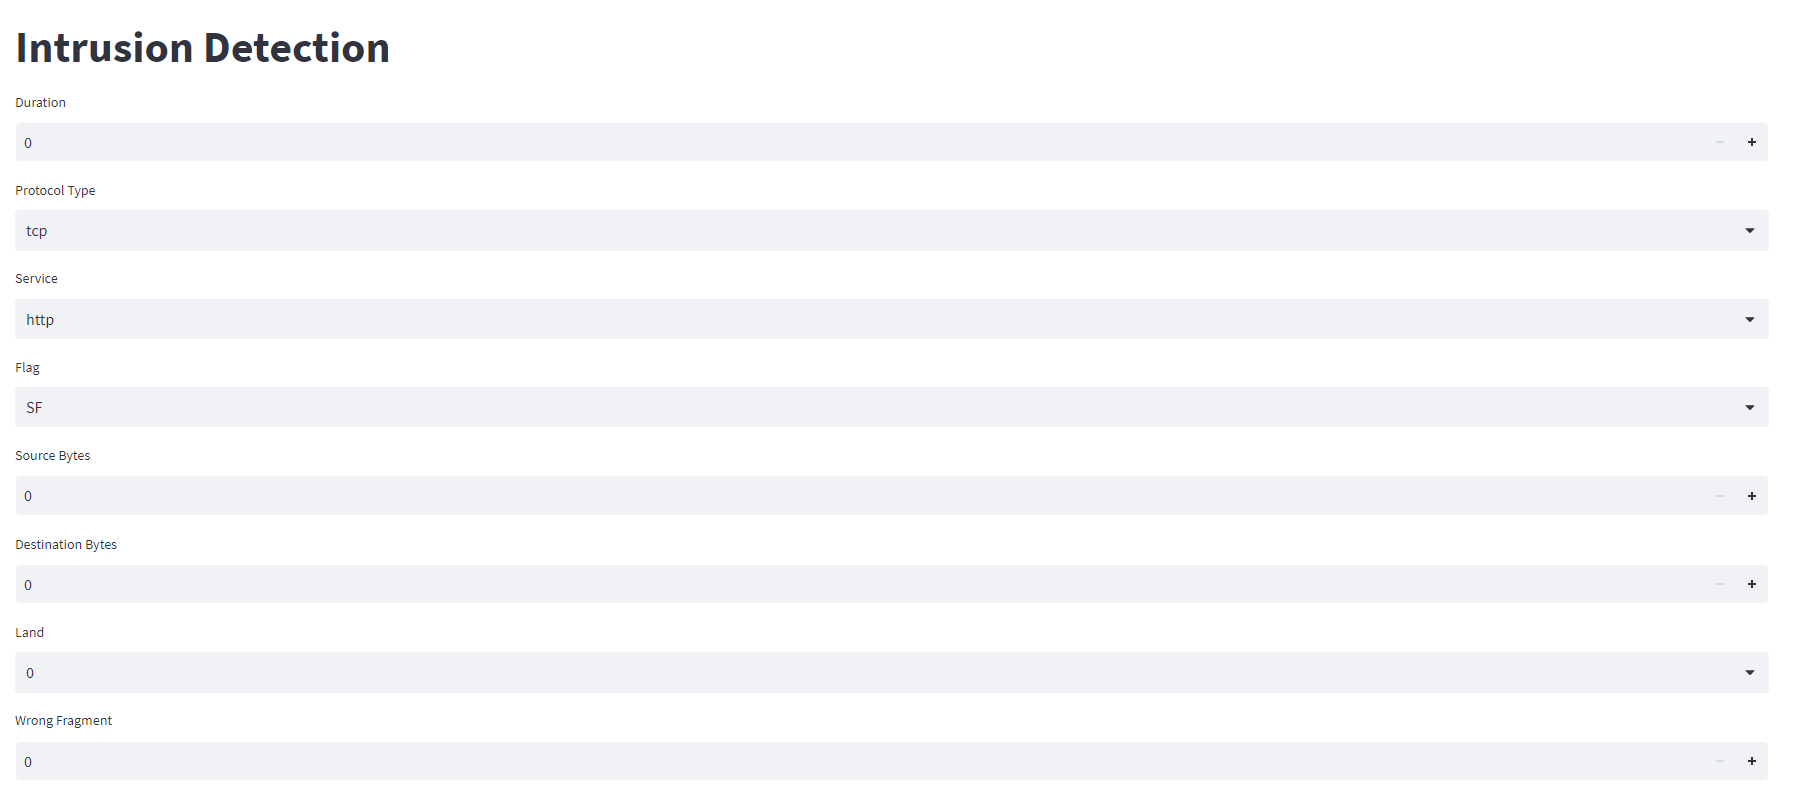
